In [1]:
%matplotlib inline
import cv2
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print('Using GPU')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print('Using CPU')

Using GPU


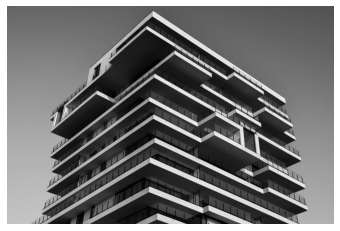

In [2]:
img_path = f'image/building.png'

bgr_img = cv2.imread(img_path) # load color image
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY) # convert to grayscale

# resize to smaller
h, w = gray_img.shape
small_img = resize(gray_img, (int(0.3*h), int(.3*w)))

# rescale entries to lie in [0,1]
small_img = small_img.astype("float32")/255

# plot image
plt.imshow(small_img, cmap='gray')
plt.axis('off');

In [10]:
gray_img[:5]

array([[100, 105, 103, ...,  81,  81,  81],
       [101, 102, 102, ...,  79,  78,  78],
       [104,  99, 101, ...,  79,  78,  76],
       [104,  98,  99, ...,  81,  80,  79],
       [100,  96,  98, ...,  79,  80,  81]], dtype=uint8)

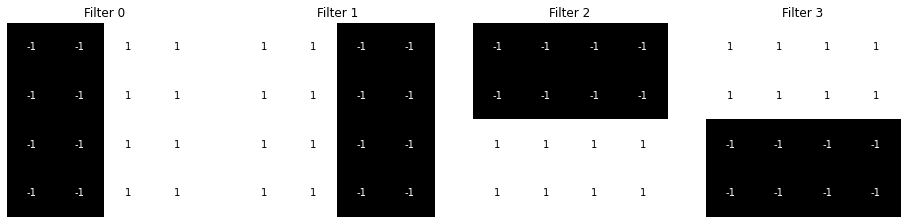

In [3]:
# Specify the Filters
filter_vals = np.array(
    [[-1, -1, 1, 1],
     [-1, -1, 1, 1],
     [-1, -1, 1, 1],
     [-1, -1, 1, 1]])

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = [filter_1, filter_2, filter_3, filter_4]

# visualize all filters
fig, axes = plt.subplots(ncols=4, figsize=(16, 12))
for i, ax in enumerate(axes):
    ax.imshow(filters[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Filter {i}')
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x), horizontalalignment='center',
                        verticalalignment='center', color='white' if filters[i][x][y]<0 else 'black')

(-0.5, 1531.5, 1020.5, -0.5)

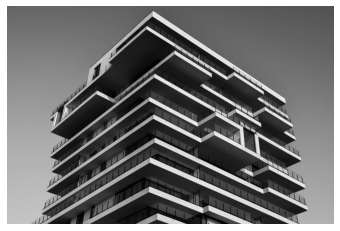

In [4]:
# Visualize the Activation Maps for Each Filter
plt.imshow(small_img, cmap='gray')
plt.axis('off')

In [7]:
# Define single-layer CNN
cnn = Sequential(
    [Convolution2D(1, (4, 4), activation='relu', input_shape=(small_img.shape[0], small_img.shape[1], 1))])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 1018, 1529, 1)     17        
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


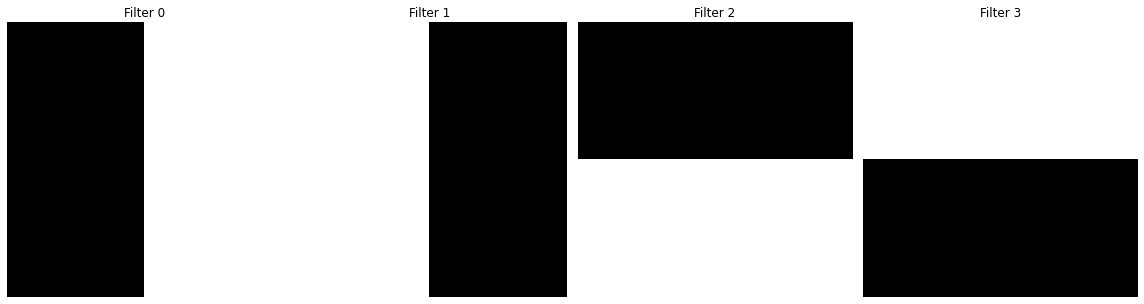

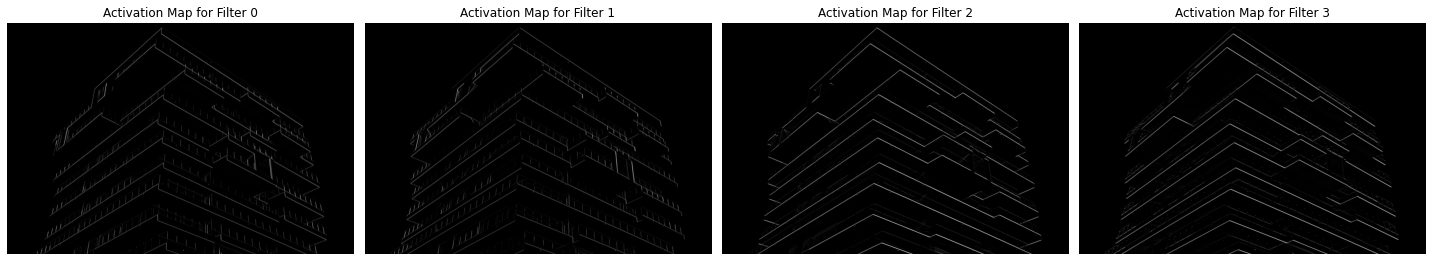

In [6]:
# Apply convolutional filter and return output
def apply_filter(img, index, filter_list, ax):
    # set the weights of the filter in the convolutional layer to filter_list[i]
    cnn.layers[0].set_weights([np.reshape(filter_list[i], (4,4,1,1)), np.array([0])])
    # plot the corresponding activation map
    ax.imshow(np.squeeze(cnn.predict(np.reshape(img, (1, img.shape[0], img.shape[1], 1)))), cmap='gray')

# visualize all filters
fig, axes = plt.subplots(ncols=4, figsize=(16, 12))
for i, ax in enumerate(axes):
    ax.imshow(filters[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Filter {i}')
fig.tight_layout()

# visualize all activation maps
fig, axes = plt.subplots(ncols=4, figsize=(20, 20))
for i, ax in enumerate(axes):
    apply_filter(small_img, i, filters, ax)
    ax.axis('off')
    ax.set_title(f'Activation Map for Filter {i}')
fig.tight_layout()